In [1]:
!pip3 install PyMuPDF
!pip3 install sentence_transformers
# Importing all the libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import fitz
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
# Importing all the libraries required.
# Big Data Science - Professor Anasse Bari - Homework 3 - Topic Modelling
# Harsh Tambi (ht2293) - Undergraduate
# Syed Ali Haider (sh6070) - Undergraduate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.3/163.3 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [2]:
# 1. Data Cleaning

def extract_text(filepath):
    pdf_text = ""
    with fitz.open(filepath) as pdf:   # Using the PyMuPDF library to read the pdfs
        for page in pdf:
            pdf_text += page.get_text()
    return pdf_text

def get_abstract_and_title(pdf_text):
    pdf_lines = pdf_text.split('\n')
    # Getting the title
    abs_flag = False
    title_flag = False
    title = ""
    abstract = ""
    for line in pdf_lines:
        if not title_flag:
            title += line
            if ("Abstract" in line
                or 'ABSTRACT' in line):
                title_flag = True
        elif not abs_flag:
            if ("introduction" in line
                or "1. introduction" in line   #not considering "Keyowords" here.
                or "1. Introduction" in line   #this is what usually seperates abstract from the introduction.
                or "Introduction" in line
                or "INTRODUCTION" in line):
                abs_flag = True
            else:
                abstract += line
    title_and_abs = title+" \n"+abstract
    return title_and_abs

# Preprocessing the text
def preprocessing(text):
  text = re.sub(r'[^a-zA-Z\s]', '', text)
  text = text.lower()
  # we will need to tokenise to do further processing
  tokens = word_tokenize(text)
  # remove stop words
  stop_words = set(stopwords.words('english'))
  # tokenizing and then removing the stop words from the tokens.
  token_wo_stopwords = [word for word in tokens if word not in stop_words]
  lemmatizer = WordNetLemmatizer()
  # Now we are lemmatizing the tokens
  lemmatized_tokens = [lemmatizer.lemmatize(word) for word in token_wo_stopwords]
  pre_processed_text = ' '.join(lemmatized_tokens)
  return pre_processed_text

# Just seeing how it looks on a sample result

sample = '/content/doc1.pdf'
text = extract_text(sample)
title_and_abs = get_abstract_and_title(text)
preprocessed_title_and_abs = preprocessing(title_and_abs)

# Step 1 Completed, all three functions can be used to extract abstract, and
# title from

In [3]:
preprocessed_title_and_abs

'j condensed matter nucl sci research articleheat production rf detection cathodic polarization ofpalladium liodvittorio violante e castagna lecci g pagano sansovini f sartoenea unit tecnica fusione c r frascati via enrico fermi frascati rome italyabstract study fleischmannpons effect fpe ie production excess power production electrochemical loadingof deuterium palladium past labeled cold fusion notably multidisciplinary character involving solid state andnuclear physic material science electrochemistry eld correlation material status occurrence ofthe effect well change electrochemical interface status observed although last two decadesin several calorimetric experiment effect observed well measurement uncertainty mechanism producingthe excess power completely understood far lack reproducibility responsible absence clearexplanation phenomenon based experimental apparatus designed enhance spectrum information required todene effect recently order improve aspect research specic work carr

In [4]:
# Applying Embeddings to the Pre Processed Data
from nltk.tokenize import word_tokenize
from sentence_transformers import SentenceTransformer
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

def preprocess_for_bert(text):
    return text.lower()

def word2vec(text, min_count=1, vector_size=100):
    words = word_tokenize(text.lower())
    w2v_model = Word2Vec(sentences=[words], min_count=min_count, vector_size=vector_size)
    doc_embedding = np.mean([w2v_model.wv[word] for word in words if word in w2v_model.wv], axis=0)
    return doc_embedding

# Using the SentenceTransformer to apply bert to our pre processed text
def bert(text):
  bert_model = SentenceTransformer('bert-base-nli-mean-tokens')
  preprocessed_bert = preprocess_for_bert(text)
  bert_embeddings = bert_model.encode(preprocessed_bert)
  return bert_embeddings




In [5]:
# Taking the whole corpus here
random_docs = ['/content/doc1.pdf', '/content/doc2.pdf', '/content/doc3.pdf',
               '/content/doc4.pdf', '/content/doc5.pdf', '/content/doc6.pdf',
               '/content/doc7.pdf', '/content/doc8.pdf', '/content/doc9.pdf',
               '/content/doc10.pdf', '/content/doc11.pdf', '/content/doc12.pdf',
               '/content/doc13.pdf', '/content/doc14.pdf', '/content/doc15.pdf',
               '/content/doc16.pdf', '/content/doc17.pdf', '/content/doc18.pdf',
               '/content/doc19.pdf', '/content/doc20.pdf', '/content/doc21.pdf',
               '/content/doc22.pdf', '/content/doc23.pdf', '/content/doc24.pdf',
               '/content/doc25.pdf', '/content/doc26.pdf', '/content/doc27.pdf',
               '/content/doc28.pdf', '/content/doc29.pdf', '/content/doc30.pdf',
               '/content/doc31.pdf', '/content/doc32.pdf']

from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import random
title_abs_embeddings_array_bert = []
title_abs_embeddings_array_w2v =  []

for doc in random_docs:
  text = extract_text(doc)
  title_and_abs = get_abstract_and_title(text)
  preprocessed_title_and_abs = preprocessing(title_and_abs)
  # get bert for abs and title
  title_abs_embeddings_array_bert.append(bert(preprocessed_title_and_abs))
  title_abs_embeddings_array_w2v.append(word2vec(preprocessed_title_and_abs))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [6]:
len(title_abs_embeddings_array_w2v)

32

In [7]:
def calculate_similarity(embedding1, embedding2):
    return cosine_similarity(embedding1.reshape(1, -1), embedding2.reshape(1, -1))[0][0]

In [8]:
#For Word2Vec
def find_most_similar_documents(embedding_index, embeddings_array, k=3):
    similarities = []
    for i, embedding in enumerate(embeddings_array):
        if i != embedding_index:
            similarity = calculate_similarity(embedding, embeddings_array[embedding_index])
            similarities.append((i, similarity))
    similarities.sort(key=lambda x: x[1], reverse=True) #to get the first 3 most similair embeddings
    return similarities[:k]
similar_documents = []
for i, embedding in enumerate(title_abs_embeddings_array_w2v): #calling embeddings
    similar_docs = find_most_similar_documents(i, title_abs_embeddings_array_w2v) #calling embeddings
    similar_documents.append((i, similar_docs))

In [10]:
# Printing the similiar docs (we did compare 5 documents, but then we decided to do it for all the documents to get a better undertanding.)
for doc_index, similar_docs in similar_documents:
    print(f"Document {doc_index} - Most similar documents:")
    for similar_doc_index, similarity in similar_docs:
        print(f"    - Document {similar_doc_index}: Similarity Score: {similarity}")

Document 0 - Most similar documents:
    - Document 26: Similarity Score: 0.9796772003173828
    - Document 12: Similarity Score: 0.9669092893600464
    - Document 11: Similarity Score: 0.9629559516906738
Document 1 - Most similar documents:
    - Document 10: Similarity Score: 0.9841487407684326
    - Document 3: Similarity Score: 0.9837314486503601
    - Document 25: Similarity Score: 0.9739634990692139
Document 2 - Most similar documents:
    - Document 13: Similarity Score: 0.9865404963493347
    - Document 27: Similarity Score: 0.9782974123954773
    - Document 12: Similarity Score: 0.9772329330444336
Document 3 - Most similar documents:
    - Document 25: Similarity Score: 0.9862829446792603
    - Document 1: Similarity Score: 0.9837314486503601
    - Document 20: Similarity Score: 0.9783177971839905
Document 4 - Most similar documents:
    - Document 8: Similarity Score: 0.9622704982757568
    - Document 23: Similarity Score: 0.9497649073600769
    - Document 19: Similarity Scor

In [11]:
from collections import defaultdict
all_similarities = defaultdict(list)
for doc_index, similar_docs in similar_documents:
    for similar_doc_index, similarity in similar_docs:
      # Ensure doc_index is less than similar_doc_index to avoid double counting
        if doc_index < similar_doc_index:
          all_similarities[(doc_index, similar_doc_index)].append(similarity)
top_three = sorted(all_similarities.items(), key=lambda x: max(x[1]), reverse=True)[:3]
print("Top Three Most Similar Documents Word2Vec:")
for (doc_index, similar_doc_index), similarity_scores in top_three:
    print(f"Document {doc_index} and Document {similar_doc_index}: Max Similarity Score: {max(similarity_scores)}")


Top Three Most Similar Documents Word2Vec:
Document 20 and Document 25: Max Similarity Score: 0.9899647831916809
Document 2 and Document 13: Max Similarity Score: 0.9865404963493347
Document 3 and Document 25: Max Similarity Score: 0.9862829446792603


In [12]:
#For BERT
def find_most_similar_documents(embedding_index, embeddings_array, k=3):
    similarities = []
    for i, embedding in enumerate(embeddings_array):
        if i != embedding_index:
            similarity = calculate_similarity(embedding, embeddings_array[embedding_index])
            similarities.append((i, similarity))
    similarities.sort(key=lambda x: x[1], reverse=True) #to get the first 3 most similair embeddings
    return similarities[:k]
similar_documents = []
for i, embedding in enumerate(title_abs_embeddings_array_bert): #calling embeddings
    similar_docs = find_most_similar_documents(i, title_abs_embeddings_array_bert) #calling embeddings
    similar_documents.append((i, similar_docs))

In [13]:
for doc_index, similar_docs in similar_documents:
    print(f"Document {doc_index} - Most similar documents:")
    for similar_doc_index, similarity in similar_docs:
        print(f"    - Document {similar_doc_index}: Similarity Score: {similarity}")

Document 0 - Most similar documents:
    - Document 24: Similarity Score: 0.8976279497146606
    - Document 23: Similarity Score: 0.8675436973571777
    - Document 2: Similarity Score: 0.8655828237533569
Document 1 - Most similar documents:
    - Document 29: Similarity Score: 0.8939472436904907
    - Document 31: Similarity Score: 0.8620800375938416
    - Document 0: Similarity Score: 0.8443030714988708
Document 2 - Most similar documents:
    - Document 12: Similarity Score: 0.9219457507133484
    - Document 4: Similarity Score: 0.9061029553413391
    - Document 17: Similarity Score: 0.8833496570587158
Document 3 - Most similar documents:
    - Document 24: Similarity Score: 0.8311573266983032
    - Document 4: Similarity Score: 0.8214265704154968
    - Document 7: Similarity Score: 0.8181036710739136
Document 4 - Most similar documents:
    - Document 2: Similarity Score: 0.9061029553413391
    - Document 17: Similarity Score: 0.8853927850723267
    - Document 30: Similarity Score: 

In [14]:
from collections import defaultdict
all_similarities = defaultdict(list)
for doc_index, similar_docs in similar_documents:
    for similar_doc_index, similarity in similar_docs:
      # Ensure doc_index is less than similar_doc_index to avoid double counting
        if doc_index < similar_doc_index:
          all_similarities[(doc_index, similar_doc_index)].append(similarity)
top_three = sorted(all_similarities.items(), key=lambda x: max(x[1]), reverse=True)[:3]
print("Top Three Most Similar Documents BERT:")
for (doc_index, similar_doc_index), similarity_scores in top_three:
    print(f"Document {doc_index} and Document {similar_doc_index}: Max Similarity Score: {max(similarity_scores)}")


Top Three Most Similar Documents BERT:
Document 9 and Document 11: Max Similarity Score: 0.9282512664794922
Document 2 and Document 12: Max Similarity Score: 0.9219457507133484
Document 8 and Document 9: Max Similarity Score: 0.915703535079956


In [15]:
!apt-get update

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:7 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [2,053 kB]
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:9 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,635 kB]
Get:10 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,081 kB]
Hit:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:13 https://ppa.launchpadconte

In [16]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark

In [17]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

In [18]:
import findspark
findspark.init()

In [19]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import PCA
from pyspark.ml.linalg import Vectors


In [20]:
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark

In [21]:
# 3. Applying Dimensionality reduction

from pyspark.sql import SparkSession
from pyspark.ml.feature import PCA
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

data = [(Vectors.dense(embedding.tolist()),) for embedding in title_abs_embeddings_array_bert]
data_df = spark.createDataFrame(data, ["features"])
vector_assembler = VectorAssembler(inputCols=["features"], outputCol="vector_features")
data_with_vectors = vector_assembler.transform(data_df)
pca = PCA(k=30, inputCol="vector_features", outputCol="pca_features")
model = pca.fit(data_with_vectors)
reduced_data = model.transform(data_with_vectors).select("pca_features")
reduced_data_df = reduced_data.toPandas()
spark.stop()


In [22]:
print(reduced_data_df.shape)

(32, 1)


In [23]:
X = [vector.toArray() for vector in reduced_data_df['pca_features']]

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
X

[array([-2.14410875,  2.80702296, -1.17596667, -0.48449158, -1.15989587,
         2.39799731,  1.70351794,  2.30000648, -1.467391  , -0.83616359,
         2.0518931 ,  1.16949637,  2.24425224,  0.23652733,  1.77878016,
         0.99772933,  0.29798015, -3.25367759, -1.70684755,  1.18259981,
         0.37385999,  0.77951756, -0.99095269,  1.3762957 ,  0.48104106,
        -1.25948324,  1.88656182, -2.74201323, -0.99812403, -0.23521185]),
 array([-0.4229896 , -1.52435989, -0.84086157, -3.13735244,  1.20015386,
         1.65828823,  0.51975724, -0.17530919, -1.21841743,  1.84819428,
         0.89139754, -1.17087129,  1.55638174,  0.60459702,  2.60835701,
         0.198344  , -0.03002733, -2.36544896, -2.15124069,  0.80414769,
         0.18546794,  1.67313368, -1.81074106,  1.64608727, -1.23643641,
        -0.57580432,  1.6973963 , -0.54327166, -0.8513367 ,  0.9356468 ]),
 array([-0.50822   , -1.65048046, -1.80240044,  2.76955468, -0.95815892,
         0.19952099,  1.42652304,  1.72224479, 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

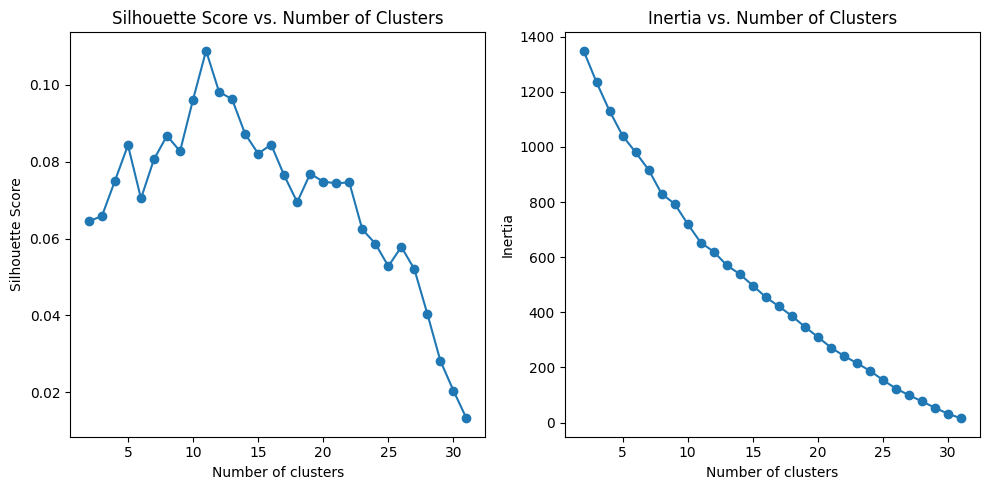

In [25]:
#Finding optimal number of clusters
silhouette_scores = []
inertias = []
cluster_range = range(2, 32)
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    inertia = kmeans.inertia_
    inertias.append(inertia)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.subplot(1, 2, 2)
plt.plot(cluster_range, inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia vs. Number of Clusters')
plt.tight_layout()
plt.show()

# According to the above graphs, 10 is the number of clusters that seems optimal for this. However looking at the document similarity in the clusters it doesn't make sense to have so many clusters since they are very similar to each other. hence we will go with our next optimal cluster which is 2.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

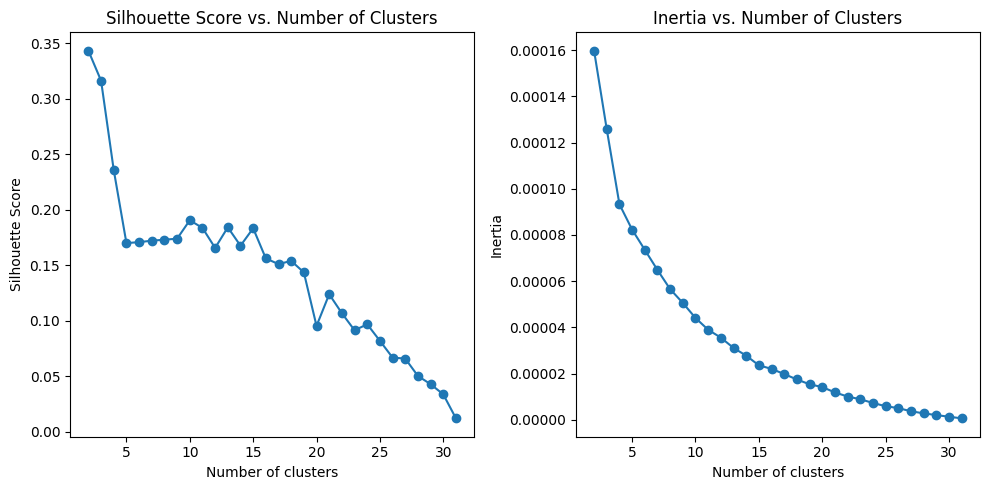

In [26]:
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark
# Applying it on the embedding retrieved from W2V

data = [(Vectors.dense(embedding.tolist()),) for embedding in title_abs_embeddings_array_w2v]
data_df = spark.createDataFrame(data, ["features"])
vector_assembler = VectorAssembler(inputCols=["features"], outputCol="vector_features")
data_with_vectors = vector_assembler.transform(data_df)
pca = PCA(k=30, inputCol="vector_features", outputCol="pca_features")
model = pca.fit(data_with_vectors)
reduced_data = model.transform(data_with_vectors).select("pca_features")
reduced_data_df = reduced_data.toPandas()
spark.stop()

X = [vector.toArray() for vector in reduced_data_df['pca_features']]
X

#Finding optimal number of clusters
silhouette_scores = []
inertias = []
cluster_range = range(2, 32)
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    inertia = kmeans.inertia_
    inertias.append(inertia)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.subplot(1, 2, 2)
plt.plot(cluster_range, inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia vs. Number of Clusters')
plt.tight_layout()
plt.show()


# According to the above graphs, 2 is the number of clusters that seems optimal for this.

In [27]:
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark

data = [(Vectors.dense(embedding.tolist()),) for embedding in title_abs_embeddings_array_w2v]
data_df = spark.createDataFrame(data, ["features"])
vector_assembler = VectorAssembler(inputCols=["features"], outputCol="vector_features")
data_with_vectors = vector_assembler.transform(data_df)
pca = PCA(k=30, inputCol="vector_features", outputCol="pca_features")
model = pca.fit(data_with_vectors)
reduced_data = model.transform(data_with_vectors).select("pca_features")
reduced_data_df = reduced_data.toPandas()
spark.stop()

X = [vector.toArray() for vector in reduced_data_df['pca_features']]
X

#Finding cluster labels for 2 cluster
silhouette_scores = []
inertias = []
cluster_range = range(2, 3)
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    inertia = kmeans.inertia_
    inertias.append(inertia)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [28]:
cluster_labels

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [29]:
random_docs = ['/content/doc1.pdf', '/content/doc2.pdf', '/content/doc3.pdf',
               '/content/doc4.pdf', '/content/doc5.pdf', '/content/doc6.pdf',
               '/content/doc7.pdf', '/content/doc8.pdf', '/content/doc9.pdf',
               '/content/doc10.pdf', '/content/doc11.pdf', '/content/doc12.pdf',
               '/content/doc13.pdf', '/content/doc14.pdf', '/content/doc15.pdf',
               '/content/doc16.pdf', '/content/doc17.pdf', '/content/doc18.pdf',
               '/content/doc19.pdf', '/content/doc20.pdf', '/content/doc21.pdf',
               '/content/doc22.pdf', '/content/doc23.pdf', '/content/doc24.pdf',
               '/content/doc25.pdf', '/content/doc26.pdf', '/content/doc27.pdf',
               '/content/doc28.pdf', '/content/doc29.pdf', '/content/doc30.pdf',
               '/content/doc31.pdf', '/content/doc32.pdf']

def get_abs_title(pdf_text):
    pdf_lines = pdf_text.split('\n')
    # Getting the title
    abs_flag = False
    title_flag = False
    title = ""
    abstract = ""
    for line in pdf_lines:
        if not title_flag:
            title += line
            if ("Abstract" in line
                or 'ABSTRACT' in line):
                title_flag = True
        elif not abs_flag:
            if ("introduction" in line
                or "1. introduction" in line   #not considering "Keyowords" here.
                or "1. Introduction" in line   #this is what usually seperates abstract from the introduction.
                or "Introduction" in line):
                abs_flag = True
            else:
                abstract += line
    return title, abstract

df = pd.DataFrame(columns=['Title', 'Abstract'])
for doc in random_docs:
  text = extract_text(doc)
  title, abs = get_abs_title(text)
  df = df.append({'Title': title, 'Abstract': abs}, ignore_index=True)


<ipython-input-29-a923ac246de1>:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Title': title, 'Abstract': abs}, ignore_index=True)
<ipython-input-29-a923ac246de1>:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Title': title, 'Abstract': abs}, ignore_index=True)
<ipython-input-29-a923ac246de1>:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Title': title, 'Abstract': abs}, ignore_index=True)
<ipython-input-29-a923ac246de1>:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Title': title, 'Abstract': abs}, ignore_index=True)
<ipython-input-29-a923ac246de1>:40: Futu

In [30]:
df

,Title,Abstract
0,J. Condensed Matter Nucl. Sci. 19 (2016) 319–3...,The study of the Fleischmann–Pons Effect (FPE)...
1,J. Condensed Matter Nucl. Sci. 19 (2016) 325–3...,There is a small literature on the combination...
2,"Karabut, A.B. Excess Heat Production In Pd/D D...",Experimental data from low energy nuclear reac...
3,The Seventh International Conference on Cold F...,The ability of palladium cathodes to attain an...
4,Excess Heat Production and Nuclear Ash in PdO...,Heat production nuclear ash and electrophysica...
5,Fifth International Conference on Cold Fusion ...,"Ken-ichiro OTA, Kazuhiko YAMAKI, Shinji TANABE..."
6,Fifth International Conference on Cold Fusion ...,"Shigeru ISAGAWA, Yukio KANDA and Takenori SUZU..."
7,SOME CHARACTERISTICS OF HEAT PRODUCTION USING...,Additional evidence is presented to show that ...
8,Multifunctional Ion Beam Installation “HELI...,ion accelerator of light elements with atomic ...
9,Charged Particle Emissions and Surface Morpho...,their surface. Detection and identification w...


In [31]:
reduced_data_df

,pca_features
0,"[0.0017332826319926807, -0.0010998568063749702..."
1,"[0.0028393381026325507, -0.0006192090354559325..."
2,"[0.0033539512227546923, -0.0015117618647160656..."
3,"[0.0032083113715867355, -0.0006309402865622015..."
4,"[0.006691835449691807, -0.00023774623539092469..."
5,"[0.0035981858430839692, -0.0007287541430636667..."
6,"[0.0025950682356631126, 0.00011897373712351492..."
7,"[0.006901472392450213, -0.005880823688120529, ..."
8,"[0.007280367733109401, -0.0007994074503675859,..."
9,"[0.005427520829424121, -8.536062321325795e-05,..."


In [32]:
cluster_labels

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [33]:
#For representative documents: Calculate the cluster centroids and pick 3 documents closest to the centroid.

unique_clusters = np.unique(cluster_labels)
cluster_centroids = []
for cluster_id in unique_clusters:
    cluster_data = reduced_data_df[cluster_labels == cluster_id]['pca_features']
    cluster_arrays = [np.array(features.toArray()) for features in cluster_data]
    centroid = np.mean(cluster_arrays, axis=0)
    cluster_centroids.append(centroid)


In [34]:
cluster_centroids

[array([ 6.33304846e-03, -6.55410556e-04,  3.30900854e-03,  2.46358962e-04,
        -2.22403982e-04,  5.64149832e-04,  1.64497493e-04, -1.32542151e-03,
         1.96659442e-03, -1.39705069e-03, -5.77585215e-05, -4.00552591e-04,
         3.48177457e-04, -1.18798314e-04, -1.20733380e-04,  5.90247352e-04,
        -1.62631320e-03, -1.03487570e-03, -1.07366723e-03, -1.67443168e-04,
        -8.63208927e-04,  2.75895365e-04, -7.95159768e-05, -2.99608067e-04,
         6.06102792e-04,  5.47119593e-04,  4.85999342e-04,  5.85162167e-04,
        -3.69182824e-04,  3.12934889e-05]),
 array([ 3.14411953e-03, -5.79786438e-04,  4.18628118e-03, -4.55490897e-05,
        -4.13638411e-04,  4.46517579e-04,  2.69639612e-04, -1.28051999e-03,
         1.87100284e-03, -1.43774611e-03, -3.30835432e-05, -4.64157977e-04,
         3.50100230e-04, -1.16038580e-04, -1.33489021e-04,  6.10680313e-04,
        -1.61009524e-03, -1.04845052e-03, -1.06929474e-03, -1.61694930e-04,
        -8.68517633e-04,  2.57836988e-04, -9

In [35]:
df

,Title,Abstract
0,J. Condensed Matter Nucl. Sci. 19 (2016) 319–3...,The study of the Fleischmann–Pons Effect (FPE)...
1,J. Condensed Matter Nucl. Sci. 19 (2016) 325–3...,There is a small literature on the combination...
2,"Karabut, A.B. Excess Heat Production In Pd/D D...",Experimental data from low energy nuclear reac...
3,The Seventh International Conference on Cold F...,The ability of palladium cathodes to attain an...
4,Excess Heat Production and Nuclear Ash in PdO...,Heat production nuclear ash and electrophysica...
5,Fifth International Conference on Cold Fusion ...,"Ken-ichiro OTA, Kazuhiko YAMAKI, Shinji TANABE..."
6,Fifth International Conference on Cold Fusion ...,"Shigeru ISAGAWA, Yukio KANDA and Takenori SUZU..."
7,SOME CHARACTERISTICS OF HEAT PRODUCTION USING...,Additional evidence is presented to show that ...
8,Multifunctional Ion Beam Installation “HELI...,ion accelerator of light elements with atomic ...
9,Charged Particle Emissions and Surface Morpho...,their surface. Detection and identification w...


In [36]:
df['pca_features'] = reduced_data_df['pca_features']

In [37]:
df # this contains the pca features of title+abstract

,Title,Abstract,pca_features
0,J. Condensed Matter Nucl. Sci. 19 (2016) 319–3...,The study of the Fleischmann–Pons Effect (FPE)...,"[0.0017332826319926807, -0.0010998568063749702..."
1,J. Condensed Matter Nucl. Sci. 19 (2016) 325–3...,There is a small literature on the combination...,"[0.0028393381026325507, -0.0006192090354559325..."
2,"Karabut, A.B. Excess Heat Production In Pd/D D...",Experimental data from low energy nuclear reac...,"[0.0033539512227546923, -0.0015117618647160656..."
3,The Seventh International Conference on Cold F...,The ability of palladium cathodes to attain an...,"[0.0032083113715867355, -0.0006309402865622015..."
4,Excess Heat Production and Nuclear Ash in PdO...,Heat production nuclear ash and electrophysica...,"[0.006691835449691807, -0.00023774623539092469..."
5,Fifth International Conference on Cold Fusion ...,"Ken-ichiro OTA, Kazuhiko YAMAKI, Shinji TANABE...","[0.0035981858430839692, -0.0007287541430636667..."
6,Fifth International Conference on Cold Fusion ...,"Shigeru ISAGAWA, Yukio KANDA and Takenori SUZU...","[0.0025950682356631126, 0.00011897373712351492..."
7,SOME CHARACTERISTICS OF HEAT PRODUCTION USING...,Additional evidence is presented to show that ...,"[0.006901472392450213, -0.005880823688120529, ..."
8,Multifunctional Ion Beam Installation “HELI...,ion accelerator of light elements with atomic ...,"[0.007280367733109401, -0.0007994074503675859,..."
9,Charged Particle Emissions and Surface Morpho...,their surface. Detection and identification w...,"[0.005427520829424121, -8.536062321325795e-05,..."


In [38]:
closest_documents = []
for centroid in cluster_centroids:
    distances = []
    for idx, row in df.iterrows():
        distance = np.linalg.norm(centroid - row['pca_features'])
        distances.append((idx, distance))
    closest_docs = sorted(distances, key=lambda x: x[1])[:3]
    closest_documents.append(closest_docs)

In [39]:
data = []

for cluster_id, docs in enumerate(closest_documents):
    cluster_number = cluster_id
    representative_documents = [df.loc[idx, 'Title'] + ': ' + df.loc[idx, 'Abstract'] for idx, _ in docs]
    data.append((cluster_number, representative_documents))

In [40]:
closest_documents

[[(4, 0.0019340784772653758),
  (9, 0.002049938536342577),
  (23, 0.002154956354464245)],
 [(13, 0.0012136907207890534),
  (3, 0.0012546238416128615),
  (25, 0.0013762541519401071)]]

In [41]:
cluster_info_df = pd.DataFrame(data, columns=['Cluster number', 'Representative documents'])

In [42]:
cluster_info_df

,Cluster number,Representative documents
0,0,[ Excess Heat Production and Nuclear Ash in Pd...
1,1,"[Isobe, Y., et al. Search for Coherent Deutero..."


In [43]:
cluster_info_df.to_csv('cluster_info.csv', index=False)

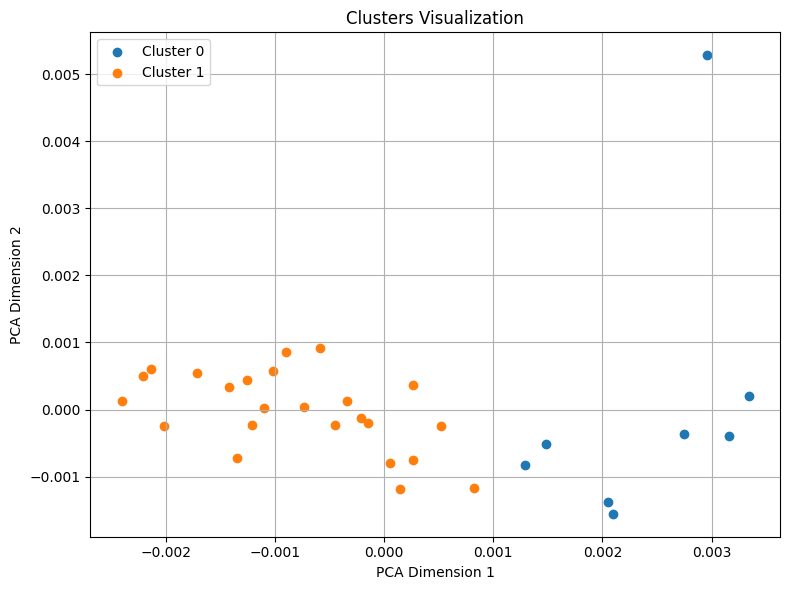

In [44]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(df['pca_features'].tolist())
plt.figure(figsize=(8, 6))
for cluster_id in np.unique(cluster_labels):
    plt.scatter(reduced_features[cluster_labels == cluster_id][:, 0],
                reduced_features[cluster_labels == cluster_id][:, 1],
                label=f'Cluster {cluster_id}')
plt.title('Clusters Visualization')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('clusters.png')
plt.show()


There was one outlier value in cluster 0 in the top right corner (in the image above.)

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
import pandas as pd

In [46]:
tfidf_vectorizer = TfidfVectorizer()

In [47]:
final_df = pd.DataFrame(columns=['Cluster number', 'Representative documents', 'Top keywords'])

In [48]:
final_df['Cluster number'] = cluster_info_df['Cluster number']
final_df['Representative documents'] = cluster_info_df['Representative documents']


In [49]:
df['cluster_label'] = cluster_labels

In [50]:
df

,Title,Abstract,pca_features,cluster_label
0,J. Condensed Matter Nucl. Sci. 19 (2016) 319–3...,The study of the Fleischmann–Pons Effect (FPE)...,"[0.0017332826319926807, -0.0010998568063749702...",1
1,J. Condensed Matter Nucl. Sci. 19 (2016) 325–3...,There is a small literature on the combination...,"[0.0028393381026325507, -0.0006192090354559325...",1
2,"Karabut, A.B. Excess Heat Production In Pd/D D...",Experimental data from low energy nuclear reac...,"[0.0033539512227546923, -0.0015117618647160656...",1
3,The Seventh International Conference on Cold F...,The ability of palladium cathodes to attain an...,"[0.0032083113715867355, -0.0006309402865622015...",1
4,Excess Heat Production and Nuclear Ash in PdO...,Heat production nuclear ash and electrophysica...,"[0.006691835449691807, -0.00023774623539092469...",0
5,Fifth International Conference on Cold Fusion ...,"Ken-ichiro OTA, Kazuhiko YAMAKI, Shinji TANABE...","[0.0035981858430839692, -0.0007287541430636667...",1
6,Fifth International Conference on Cold Fusion ...,"Shigeru ISAGAWA, Yukio KANDA and Takenori SUZU...","[0.0025950682356631126, 0.00011897373712351492...",1
7,SOME CHARACTERISTICS OF HEAT PRODUCTION USING...,Additional evidence is presented to show that ...,"[0.006901472392450213, -0.005880823688120529, ...",0
8,Multifunctional Ion Beam Installation “HELI...,ion accelerator of light elements with atomic ...,"[0.007280367733109401, -0.0007994074503675859,...",0
9,Charged Particle Emissions and Surface Morpho...,their surface. Detection and identification w...,"[0.005427520829424121, -8.536062321325795e-05,...",0


In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import pandas as pd

# as its mentioned in the assignemnt, we need to work and apply TFIDF on the cluster level
cluster_documents = df.groupby('cluster_label').agg({'Title': ' '.join, 'Abstract': ' '.join})

In [52]:
cluster_documents

,Title,Abstract
cluster_label,,
0,Excess Heat Production and Nuclear Ash in PdO...,Heat production nuclear ash and electrophysica...
1,J. Condensed Matter Nucl. Sci. 19 (2016) 319–3...,The study of the Fleischmann–Pons Effect (FPE)...


In [53]:
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(cluster_documents['Abstract'])

In [54]:
top_keywords = {}
for id, label in enumerate(cluster_documents.index):
    svd = TruncatedSVD(n_components=30, random_state=42)
    # getting the abstract data from the same cluster documents
    tfidf_matrix_svd = svd.fit_transform(tfidf_matrix)
    feature_names = vectorizer.get_feature_names_out()
    top_indices = svd.components_[id].argsort()[-6:][::-1]
    top_words = [feature_names[i] for i in top_indices]
    top_keywords[label] = top_words

In [55]:
cluster_info = []
for id, label in enumerate(cluster_documents.index):
    representative_documents = cluster_documents.loc[label, 'Title']
    top_keywords_str = ', '.join(top_keywords[label])
    cluster_info.append((label, representative_documents, top_keywords_str))
cluster_info_df = pd.DataFrame(cluster_info, columns=['Cluster number', 'Representative documents', 'Top keywords'])

In [56]:
cluster_info_df

,Cluster number,Representative documents,Top keywords
0,0,Excess Heat Production and Nuclear Ash in PdO...,"heat, electrolysis, cathode, pd, energy, excess"
1,1,J. Condensed Matter Nucl. Sci. 19 (2016) 319–3...,"ni, transmutation, radiation, ray, fig, target"


In [57]:
cluster_info_df.to_csv('cluster_info.csv', index=False)